# SUMMARY

### config config 1

#### stmin=0xf5 (500 us spacing) and bs=5, delay=0.6 
#### 2022-06-28 12:57:47.893
#### 2022-06-29 06:30:38.936 

In [509]:
time1 = round(config1_time.total_seconds()/3600,2)
config1_time

Timedelta('0 days 17:32:51.043000')

### config 2
#### stmin=1 i bs=2 delay=0.8     
#### 2022-06-29 06:43:32.831
#### 2022-06-29 14:04:38.476 


In [445]:
time2 = round(config2_time.total_seconds()/3600,2)
config2_time

Timedelta('0 days 07:21:05.645000')

### config 3
#### stmin=0, bs=0, delay=0.5

#### 2022-06-29 14:06:23.881 
#### 2022-06-30 06:59:37.844 

In [446]:
time3 = round(config3_time.total_seconds()/3600,2)
config3_time

Timedelta('0 days 16:53:13.963000')

# TEST 1. ERRORS

#### config2

In [447]:
errors_gateway1.describe()

,time_diff,time_diff_minutes
count,2243,2243.000000
mean,0 days 00:00:28.099376727,0.468323
std,0 days 00:00:32.154420401,0.535907
min,0 days 00:00:00.001000,0.000017
25%,0 days 00:00:05.074500,0.084575
50%,0 days 00:00:17.359000,0.289317
75%,0 days 00:00:38.960500,0.649342
max,0 days 00:03:56.024000,3.933733


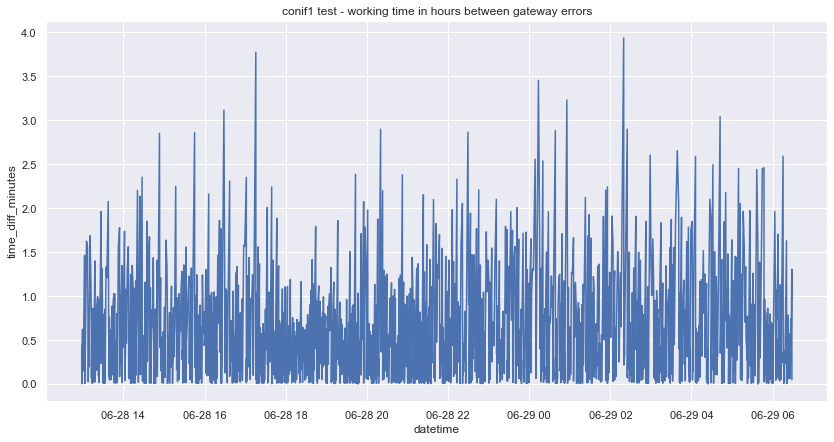

In [448]:
plt.figure(figsize=(14,7))
plt.title('conif1 test - working time in hours between gateway errors')
sns.lineplot(data = errors_gateway1, x  = 'datetime', y = 'time_diff_minutes');

In [449]:
errors_gateway1_per_hour =  round(errors_gateway1.datetime.count()/ time1,2)
errors_gateway1_per_hour

127.81

#### config1

In [385]:
errors_gateway2.describe()

,time_diff,time_diff_minutes
count,83,83.000000
mean,0 days 00:05:17.712373493,5.295206
std,0 days 00:08:53.264146582,8.887736
min,0 days 00:00:00.801000,0.013350
25%,0 days 00:00:01.602500,0.026708
50%,0 days 00:00:46.933000,0.782217
75%,0 days 00:06:46.591500,6.776525
max,0 days 00:41:25.212000,41.420200


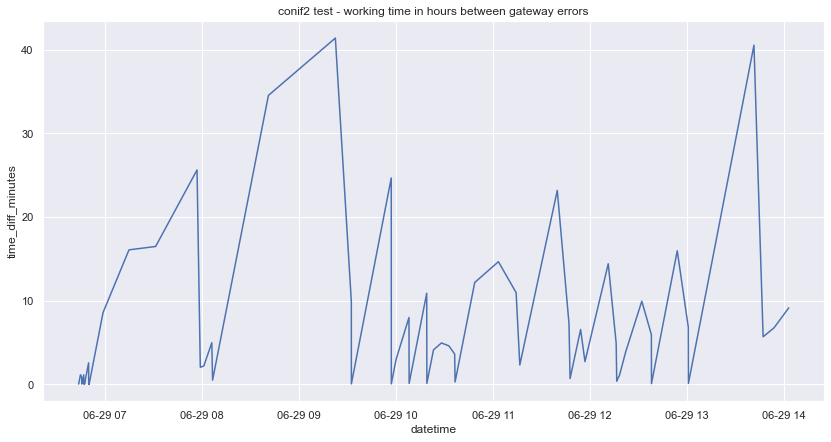

In [386]:
plt.figure(figsize=(14,7))
plt.title('conif2 test - working time in hours between gateway errors')
sns.lineplot(data = errors_gateway2, x  = 'datetime', y = 'time_diff_minutes');

In [387]:
errors_gateway2_per_hour =  round(errors_gateway2.datetime.count()/ time2,2)
errors_gateway2_per_hour

11.29

#### config3

In [451]:
errors_gateway3.describe()

,time_diff,time_diff_minutes
count,4439,4439.000000
mean,0 days 00:00:13.680272583,0.228005
std,0 days 00:00:20.856611999,0.347610
min,0 days 00:00:00.001000,0.000017
25%,0 days 00:00:01.089000,0.018150
50%,0 days 00:00:05.313000,0.088550
75%,0 days 00:00:17.536500,0.292275
max,0 days 00:04:06.526000,4.108767


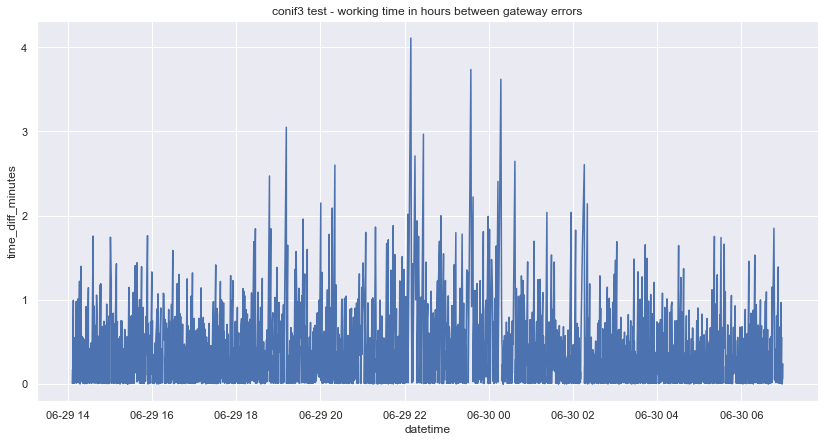

In [452]:
plt.figure(figsize=(14,7))
plt.title('conif3 test - working time in hours between gateway errors')
sns.lineplot(data = errors_gateway3, x  = 'datetime', y = 'time_diff_minutes');

In [390]:
errors_gateway3_per_hour =  round(errors_gateway3.datetime.count()/ time3, 2)
errors_gateway3_per_hour

262.82

## errors sumary

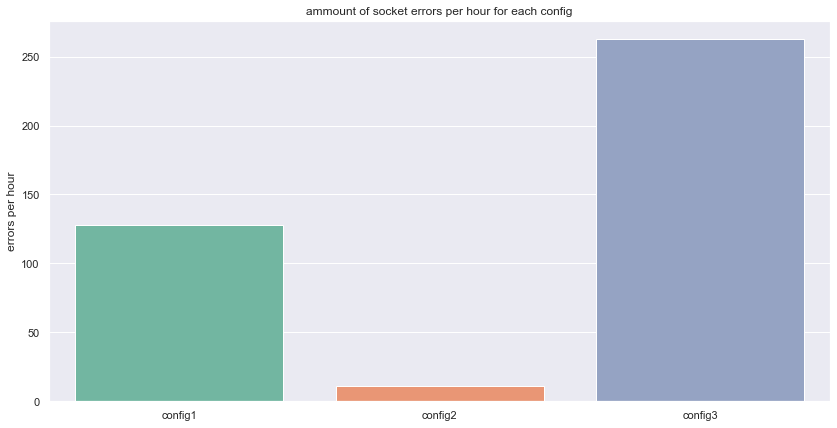

In [941]:
d = {'errors per hour':[errors_gateway1_per_hour, errors_gateway2_per_hour, errors_gateway3_per_hour]}
errors_hour = pd.DataFrame(d)

plt.figure(figsize=(14,7))
plt.title('ammount of socket errors per hour for each config')
sns.barplot(data = errors_hour, y = 'errors per hour', palette='Set2', x = [ 'config2','config1', 'config3']);

### config 1 handle errors really well - most stable set

In [944]:
s = pd.Series(['config1', 'config2', 'config3'])
errors_hour.set_index(s)

,errors per hour
config1,127.81
config2,11.29
config3,262.82


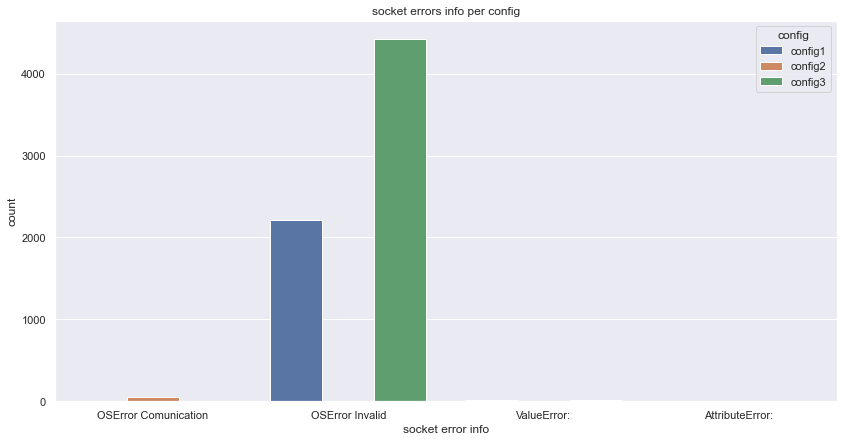

In [943]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,7))
plt.title ('socket errors info per config')
sns.barplot(data = socket_errors_info, y = 'count', x = 'socket error info', hue = 'config');

In [965]:
socket_error_info_sum

,config1,config2,config3
OSError Comunication,2217,1,4424
OSError Invalid,1,53,2
ValueError:,21,7,14
AttributeError:,1,1,1
Column_Total,2240,62,4441


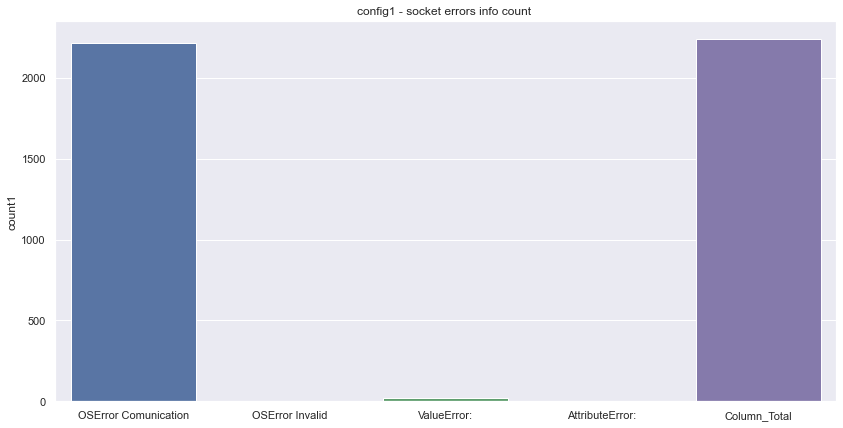

In [989]:
plt.figure(figsize=(14,7))
plt.title("config1 - socket errors info count ")

sns.barplot(x = socket_errors_info.index, y='count1',  data = socket_errors_info );

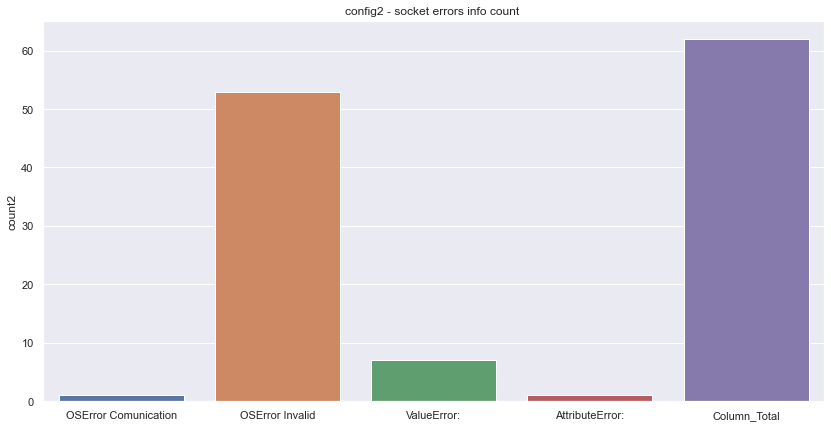

In [990]:
plt.figure(figsize=(14,7))
plt.title("config2 - socket errors info count ")
sns.barplot(x = socket_errors_info.index, y='count2',  data = socket_errors_info);

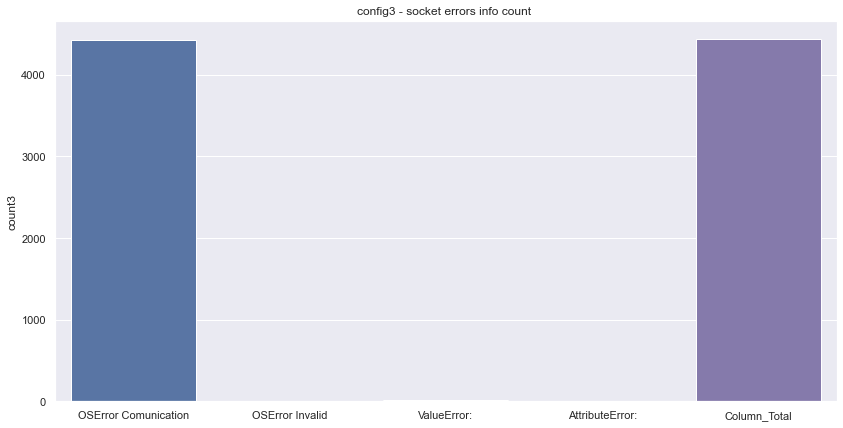

In [996]:
plt.figure(figsize=(14,7))
plt.title("config3 - socket errors info count ")
sns.barplot(x = socket_errors_info.index, y='count3',  data = socket_errors_info);

# TEST2 STORED IMAGES

#### config1

In [396]:
stored_image1.describe()

,time_diff,time_diff_sec
count,49635,49635.000000
mean,0 days 00:00:01.272424377,1.272424
std,0 days 00:00:00.689088723,0.689089
min,0 days 00:00:00.005000,0.005000
25%,0 days 00:00:00.610000,0.610000
50%,0 days 00:00:01.201000,1.201000
75%,0 days 00:00:01.792000,1.792000
max,0 days 00:00:19.840000,19.840000


In [397]:
stored_image1['time_diff_sec'] = stored_image1.apply(lambda row: row['time_diff'].total_seconds()  , axis = 1)
stored_image1.groupby(['mosaic'])['time_diff_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
mosaic,,,,,,,,
104.,3099.0,1.280841,0.687175,0.005,0.610,1.202,1.79250,5.235
106.,3111.0,1.243671,0.656613,0.006,0.612,1.199,1.77900,4.621
107.,3110.0,1.288914,0.691357,0.018,0.608,1.203,1.79700,5.999
120.,3095.0,1.249254,0.669717,0.140,0.609,1.198,1.78600,5.208
121.,3122.0,1.287231,0.699062,0.133,0.612,1.204,1.79500,5.836
122.,3087.0,1.255862,0.680788,0.171,0.607,1.198,1.78800,5.427
123.,3119.0,1.278675,0.683804,0.036,0.611,1.202,1.79100,4.760
124.,3102.0,1.235628,0.653003,0.162,0.609,1.199,1.78700,6.013
125.,3107.0,1.279312,0.696450,0.026,0.609,1.200,1.79100,5.854


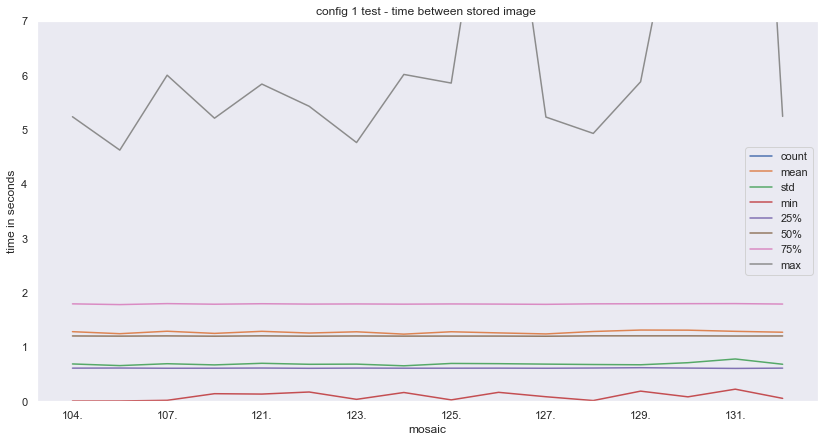

In [493]:
sns.set(style="dark")
ax =stored_image1.groupby(['mosaic'])['time_diff_sec'].describe()

ax.plot(figsize=(14,7), ylim = (0, 7), ylabel = "time in seconds" ,title = 'config 1 test - time between stored image ');

#### config2

In [454]:
stored_image2.describe()

,time_diff,time_diff_sec
count,14530,14530.000000
mean,0 days 00:00:01.820303854,1.820304
std,0 days 00:00:00.893920028,0.893920
min,0 days 00:00:00.009000,0.009000
25%,0 days 00:00:01.551250,1.551250
50%,0 days 00:00:01.614000,1.614000
75%,0 days 00:00:02.402750,2.402750
max,0 days 00:00:26.639000,26.639000


In [455]:
stored_image2['time_diff_sec'] = stored_image2.apply(lambda row: row['time_diff'].total_seconds()  , axis = 1)
stored_image2.groupby(['mosaic'])['time_diff_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
mosaic,,,,,,,,
104.,906.0,2.722008,0.906616,0.660,2.36900,2.4375,3.22475,5.871
106.,906.0,2.215365,0.893819,0.009,1.59900,2.3780,2.60100,7.399
107.,906.0,1.690560,1.354752,0.499,0.82100,1.6010,2.31325,26.456
120.,909.0,1.916850,0.745728,0.468,1.58800,1.6250,2.41100,6.696
121.,909.0,1.692243,0.701092,0.622,1.50100,1.6080,2.38300,5.007
122.,910.0,1.509551,0.682818,0.615,0.81625,1.5890,1.63400,5.025
123.,910.0,1.980649,0.857276,0.600,1.58100,1.6300,2.42600,5.771
124.,905.0,1.620794,0.636058,0.686,0.85100,1.6060,1.81100,4.229
125.,907.0,1.868864,0.828348,0.674,1.56800,1.6180,2.41050,5.766


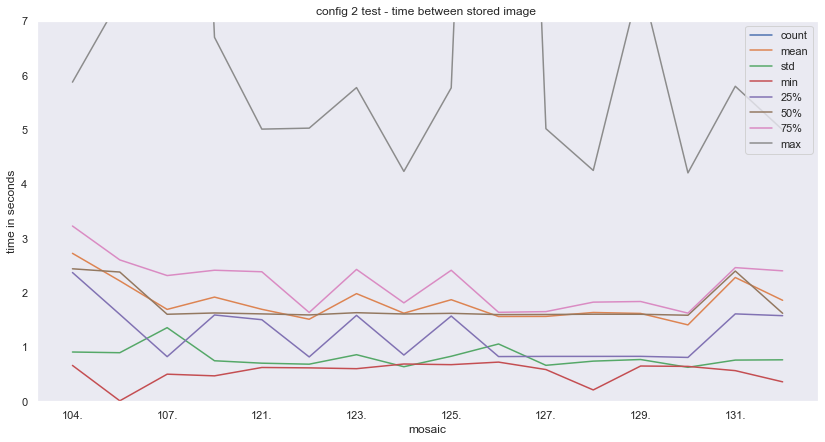

In [494]:
sns.set(style="dark")
ax =stored_image2.groupby(['mosaic'])['time_diff_sec'].describe()

ax.plot(figsize=(14,7), ylim = (0, 7), ylabel = "time in seconds" ,title = 'config 2 test - time between stored image ');

#### config3

In [402]:
stored_image3.describe()

,time_diff,time_diff_sec
count,59163,59163.000000
mean,0 days 00:00:01.027386559,1.027387
std,0 days 00:00:00.630243380,0.630243
min,0 days 00:00:00.002000,0.002000
25%,0 days 00:00:00.506000,0.506000
50%,0 days 00:00:00.993000,0.993000
75%,0 days 00:00:01.471500,1.471500
max,0 days 00:00:16.557000,16.557000


In [403]:
stored_image3['time_diff_sec'] = stored_image3.apply(lambda row: row['time_diff'].total_seconds()  , axis = 1)
stored_image3.groupby(['mosaic'])['time_diff_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
mosaic,,,,,,,,
104.,3698.0,1.025708,0.626259,0.014,0.506,0.9930,1.47600,6.013
106.,3704.0,1.023157,0.630533,0.002,0.503,0.9915,1.45050,7.511
107.,3711.0,1.034031,0.646894,0.008,0.507,0.9930,1.46850,6.523
120.,3684.0,1.030637,0.617005,0.006,0.504,0.9930,1.47700,6.535
121.,3685.0,1.024879,0.636266,0.013,0.507,0.9930,1.47900,7.501
122.,3721.0,1.019841,0.610323,0.004,0.503,0.9920,1.44700,4.526
123.,3696.0,1.022210,0.603583,0.007,0.507,0.9950,1.47100,5.000
124.,3687.0,1.021373,0.608128,0.010,0.504,0.9930,1.46400,5.014
125.,3698.0,1.045980,0.663731,0.003,0.506,0.9930,1.48500,8.615


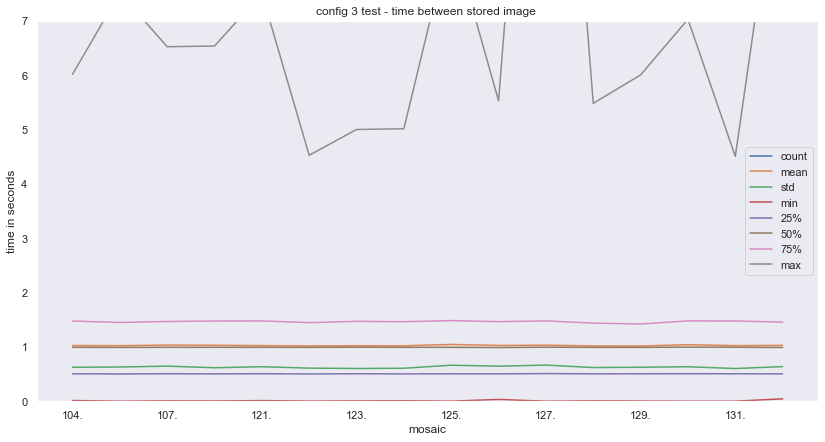

In [495]:
sns.set(style="dark")
ax =stored_image3.groupby(['mosaic'])['time_diff_sec'].describe()

ax.plot(figsize=(14,7), ylim = (0, 7) , ylabel = "time in seconds", title = 'config 3 test - time between stored image ');

### summary

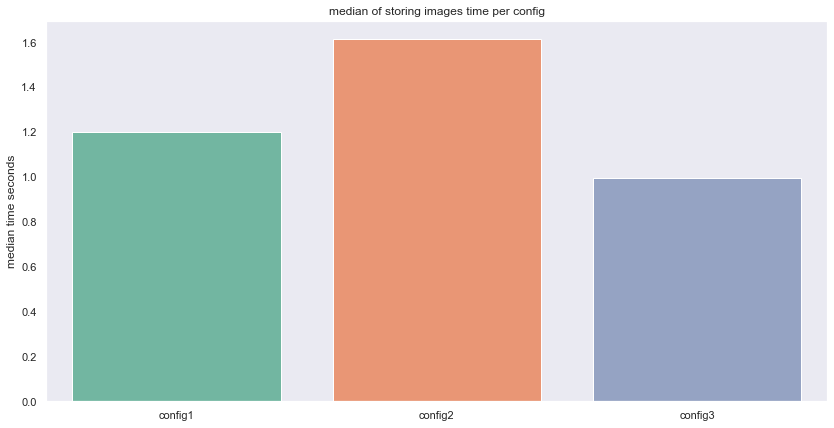

In [458]:
d = {'median time seconds':[median1, median2, median3]}
median = pd.DataFrame(d)

plt.figure(figsize=(14,7))
plt.title('median of storing images time per config')
sns.barplot(data = median, y = 'median time seconds', palette='Set2', x = ['config1', 'config2', 'config3']);

In [503]:
s = pd.Series(['config1', 'config2', 'config3'])
images_hour.set_index(s)


,storage of images per hour
config1,2828.21
config2,1976.87
config3,3502.84


## config 3 stores highest ammount of images in quickest time

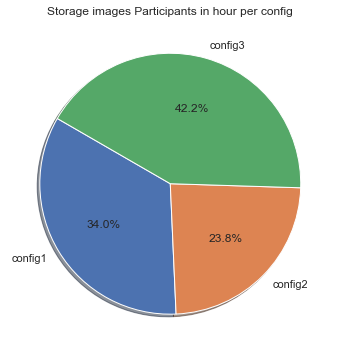

In [479]:
plt.figure(figsize=(12,6))
plt.title ('Storage images Participants in hour per config')
plt.pie(images_hour['storage of images per hour'], labels= ['config1', 'config2', 'config3'], autopct='%1.1f%%',startangle=150,shadow=True);

# test 3 server requested on device

#### config1

In [460]:
info_server1.describe()

,time_diff
count,16767
mean,0 days 00:00:03.757093576
std,0 days 00:00:14.514892162
min,0 days 00:00:00.007000
25%,0 days 00:00:00.009000
50%,0 days 00:00:00.010000
75%,0 days 00:00:00.012000
max,0 days 00:01:00.318000


#### config2

In [414]:
info_server2.describe()

,time_diff
count,7007
mean,0 days 00:00:03.752275010
std,0 days 00:00:14.506613333
min,0 days 00:00:00.007000
25%,0 days 00:00:00.009000
50%,0 days 00:00:00.010000
75%,0 days 00:00:00.012000
max,0 days 00:01:00.246000


#### config3

In [461]:
info_server3.describe()

,time_diff
count,16143
mean,0 days 00:00:03.756864399
std,0 days 00:00:14.515214217
min,0 days 00:00:00.007000
25%,0 days 00:00:00.009000
50%,0 days 00:00:00.010000
75%,0 days 00:00:00.011000
max,0 days 00:01:00.311000


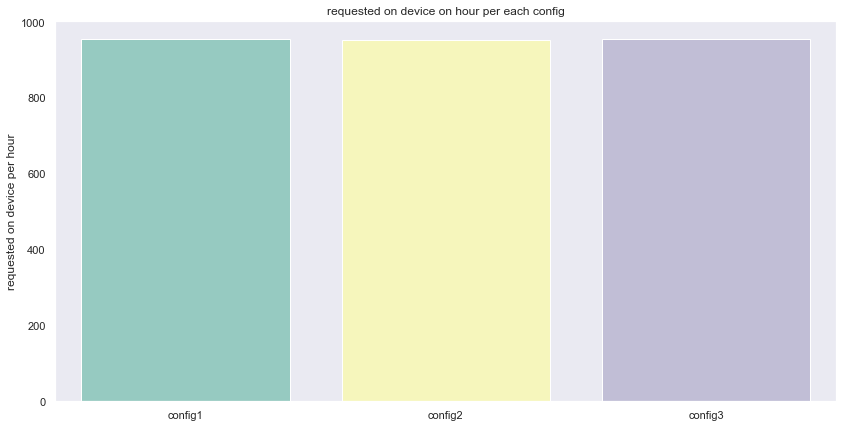

In [463]:
d = {'requested on device per hour':[count1_per_hour, count2_per_hour, count3_per_hour]}
server = pd.DataFrame(d)

plt.figure(figsize=(14,7))
plt.title('requested on device on hour per each config')
sns.barplot(data = server, y = 'requested on device per hour', palette='Set3', x = ['config1', 'config2', 'config3']);

## there was no significant difference between servers requests on device 

In [505]:
s = pd.Series(['config1', 'config2', 'config3'])
server.set_index(s)

,requested on device per hour
config1,955.38
config2,953.33
config3,955.77


# TEST4 TEMP

## gateway

#### config1

In [217]:
gateway_cpu_temp1.describe()

,temp
count,12971.000000
mean,61.400208
std,0.628437
min,53.700000
25%,61.200000
50%,61.200000
75%,61.800000
max,63.400000


#### config2

In [218]:
gateway_cpu_temp2.describe()

,temp
count,4856.000000
mean,61.717525
std,0.768518
min,53.700000
25%,61.200000
50%,61.800000
75%,62.300000
max,67.100000


#### config3

In [219]:
gateway_cpu_temp3.describe()

,temp
count,13255.000000
mean,61.220438
std,0.598680
min,53.700000
25%,60.700000
50%,61.200000
75%,61.800000
max,63.400000


## mosaic

#### config1

In [220]:
mosaic_cpu_temp1.describe()

,temp
count,12971.000000
mean,29.825850
std,1.121983
min,26.100000
25%,29.300000
50%,29.900000
75%,30.400000
max,33.100000


#### config2

In [221]:
mosaic_cpu_temp2.describe()

,temp
count,4856.000000
mean,30.009926
std,1.130619
min,27.200000
25%,29.300000
50%,30.400000
75%,30.900000
max,34.200000


#### config3

In [222]:
mosaic_cpu_temp3.describe()

,temp
count,13255.000000
mean,29.837254
std,1.129295
min,26.100000
25%,29.300000
50%,29.900000
75%,30.400000
max,32.600000


# config 2 gives a bit higher temp on mosaic and gateway CPU

In [487]:
print('config1 mosaic cpu mean: ', mosaic_cpu_temp1.temp.mean())
print('config2 mosaic cpu mean: ', mosaic_cpu_temp2.temp.mean())
print('config3 mosaic cpu mean: ', mosaic_cpu_temp3.temp.mean())

config1 mosaic cpu mean:  29.825849973016727
config2 mosaic cpu mean:  30.009925864909388
config3 mosaic cpu mean:  29.837253866465485


In [488]:
print('config1 gateway cpu mean: ', gateway_cpu_temp1.temp.mean())
print('config2 gateway cpu mean: ', gateway_cpu_temp2.temp.mean())
print('config3 gateway cpu mean: ', gateway_cpu_temp3.temp.mean())

config1 gateway cpu mean:  61.400208156657165
config2 gateway cpu mean:  61.71752471169687
config3 gateway cpu mean:  61.22043757072804
